import thư viện

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

import pandas as pd
import numpy as np
import re
import gensim
import gensim.corpora as corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import CoherenceModel
from sklearn.datasets import fetch_20newsgroups
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LAPTOP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LAPTOP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Xử lý làm sách dữ liệu

In [3]:

# Download the missing resource
nltk.download('punkt_tab')
# Danh sách stopwords tiếng Anh
stop_words = set(stopwords.words('english'))

# Hàm tiền xử lý văn bản
def preprocess(text):
    text = re.sub(r'\s+', ' ', text)  # loại bỏ khoảng trắng thừa
    text = re.sub(r"[^a-zA-Z]", " ", text)  # loại bỏ ký tự không phải chữ cái
    tokens = word_tokenize(text.lower())  # chuyển chữ thường và tách từ
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words and len(word) > 2]

    return tokens

# Lấy dữ liệu nhóm 'alt.atheism'
newsgroups = fetch_20newsgroups(subset='train', categories=['alt.atheism'], remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data

# Áp dụng tiền xử lý cho từng văn bản
data_words = [preprocess(doc) for doc in documents]

# Kiểm tra 1 kết quả
print(data_words[0][:20])  # In thử 20 từ đầu tiên của văn bản đầu tiên

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\LAPTOP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['ideologies', 'also', 'split', 'giving', 'disagree', 'upon', 'may', 'also', 'lead', 'intolerance', 'also', 'oppose', 'ideologies', 'think', 'argument', 'argument', 'religion', 'points', 'weaknesses', 'human']


In [4]:
# Tạo Dictionary
id2word = corpora.Dictionary(data_words)

# Tạo Corpus (danh sách các bag-of-words)
corpus = [id2word.doc2bow(text) for text in data_words]
print(corpus)

[[(0, 1), (1, 3), (2, 2), (3, 4), (4, 2), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 3), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 3), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 2), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 2), (44, 1), (45, 1), (46, 1), (47, 2), (48, 1), (49, 3), (50, 1), (51, 3), (52, 1), (53, 1), (54, 2), (55, 1), (56, 2), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 2), (63, 2), (64, 1), (65, 1), (66, 1), (67, 1), (68, 3), (69, 1), (70, 1), (71, 3), (72, 1), (73, 1), (74, 2), (75, 2), (76, 2), (77, 1), (78, 1), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 9), (85, 1), (86, 2), (87, 1), (88, 1), (89, 1), (90, 1), (91, 2), (92, 1), (93, 1), (94, 2), (95, 1), (96, 1), (97, 2), (98, 1), (99, 1), (100, 2), (101, 2), (102, 4), (103, 2), (104, 1), (105, 1), (106, 1), (107, 2), (108, 1), (109, 1), (110, 4)

Tạo mô hình LDA

In [5]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=5,  # bạn có thể thử 5-10 để tìm số lượng phù hợp
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

# Hiển thị các chủ đề
for idx, topic in lda_model.print_topics(-1):
    print(f"Chủ đề {idx}:\n{topic}\n")


Chủ đề 0:
0.004*"send" + 0.004*"gillow" + 0.003*"edu" + 0.003*"vatican" + 0.003*"enviroleague" + 0.003*"bone" + 0.003*"faq" + 0.003*"mail" + 0.003*"files" + 0.003*"books"

Chủ đề 1:
0.017*"jesus" + 0.008*"said" + 0.006*"away" + 0.006*"could" + 0.005*"prophecy" + 0.005*"stay" + 0.004*"david" + 0.004*"com" + 0.004*"messiah" + 0.004*"lord"

Chủ đề 2:
0.011*"islam" + 0.009*"one" + 0.007*"matthew" + 0.006*"islamic" + 0.006*"women" + 0.005*"sex" + 0.004*"also" + 0.004*"john" + 0.004*"think" + 0.004*"time"

Chủ đề 3:
0.021*"god" + 0.014*"atheism" + 0.012*"atheists" + 0.010*"believe" + 0.008*"one" + 0.006*"atheist" + 0.005*"alt" + 0.005*"existence" + 0.004*"subject" + 0.004*"exist"

Chủ đề 4:
0.011*"one" + 0.010*"people" + 0.009*"would" + 0.007*"think" + 0.007*"god" + 0.007*"argument" + 0.007*"true" + 0.006*"many" + 0.005*"evidence" + 0.005*"like"



kiểm tra Coherence Score

In [6]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nMức độ nhất quán (Coherence Score):', coherence_lda)



Mức độ nhất quán (Coherence Score): 0.35484127946559435


Trực quan hóa mô hình

In [7]:
import pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
pyLDAvis.display(vis)


so sánh NMF vs LDA

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF
from gensim.models import CoherenceModel
from gensim import corpora
import gensim
import matplotlib.pyplot as plt

# Giả sử bạn đã có data_words (tokenized words)
data_texts = [" ".join(words) for words in data_words]

# TF-IDF cho NMF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(data_texts)

# CountVectorizer cho LDA
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
count = count_vectorizer.fit_transform(data_texts)

# Tạo dictionary và corpus cho LDA (gensim)
id2word = corpora.Dictionary(data_words)
corpus_gensim = [id2word.doc2bow(text) for text in data_words]

# ----- Mô hình LDA -----
lda_model = gensim.models.LdaModel(corpus=corpus_gensim,
                                   id2word=id2word,
                                   num_topics=5,
                                   random_state=42,
                                   update_every=1,
                                   chunksize=100,
                                   passes=10,
                                   alpha='auto',
                                   per_word_topics=True)

# ----- Mô hình NMF -----
nmf_model = NMF(n_components=5, random_state=42)
nmf_model.fit(tfidf)

# ----- Hiển thị chủ đề LDA -----
print("📌 Chủ đề LDA:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Chủ đề {idx}: {topic}")

# ----- Hiển thị chủ đề NMF -----
print("\n📌 Chủ đề NMF:")
feature_names = tfidf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf_model.components_):
    print(f"Chủ đề {topic_idx}: ", " ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

# ----- Đánh giá độ mạch lạc -----
coherence_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v').get_coherence()
print(f"\n✅ Coherence LDA: {coherence_lda:.4f}")


📌 Chủ đề LDA:
Chủ đề 0: 0.009*"islam" + 0.009*"think" + 0.007*"one" + 0.007*"system" + 0.007*"men" + 0.006*"moral" + 0.006*"islamic" + 0.006*"women" + 0.005*"morality" + 0.005*"objective"
Chủ đề 1: 0.013*"would" + 0.009*"think" + 0.009*"people" + 0.007*"said" + 0.006*"could" + 0.005*"like" + 0.005*"one" + 0.004*"war" + 0.004*"time" + 0.004*"know"
Chủ đề 2: 0.009*"muslims" + 0.005*"edu" + 0.005*"rushdie" + 0.004*"atheism" + 0.004*"allah" + 0.004*"alt" + 0.004*"islam" + 0.004*"book" + 0.003*"muslim" + 0.003*"send"
Chủ đề 3: 0.016*"god" + 0.011*"one" + 0.009*"argument" + 0.007*"believe" + 0.007*"people" + 0.007*"atheism" + 0.006*"true" + 0.006*"atheists" + 0.006*"religion" + 0.006*"evidence"
Chủ đề 4: 0.014*"jesus" + 0.008*"one" + 0.007*"matthew" + 0.007*"people" + 0.005*"see" + 0.004*"time" + 0.004*"would" + 0.004*"john" + 0.003*"said" + 0.003*"liar"

📌 Chủ đề NMF:
Chủ đề 0:  people think religion islam know like moral say time objective
Chủ đề 1:  ico tek vice bobbe queens bronx beaucha

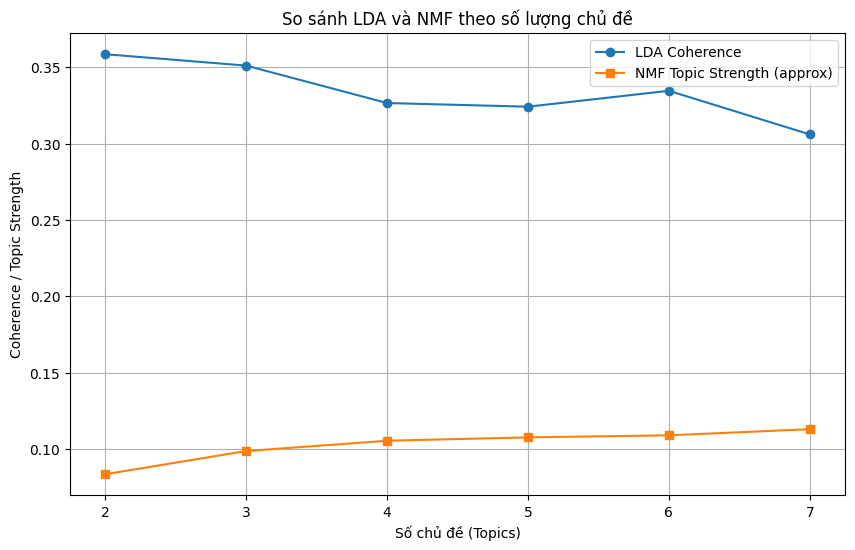

In [9]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel
from gensim import corpora
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
import numpy as np

# Giả lập dữ liệu văn bản (nếu bạn có dữ liệu thật thì thay vào đây)
data_texts = [" ".join(doc) for doc in data_words]

# Chuẩn bị dữ liệu cho LDA
id2word = corpora.Dictionary(data_words)
corpus = [id2word.doc2bow(text) for text in data_words]

# Chuẩn bị dữ liệu cho NMF
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(data_texts)

# So sánh theo số lượng chủ đề
lda_scores = []
nmf_scores = []
topic_range = range(2, 8)

for num_topics in topic_range:
    # LDA
    lda_model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=42,
                                       passes=10,
                                       alpha='auto',
                                       per_word_topics=True)
    coherence_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v').get_coherence()
    lda_scores.append(coherence_lda)

    # NMF
    nmf_model = NMF(n_components=num_topics, random_state=42)
    W = nmf_model.fit_transform(tfidf)
    avg_strength = np.mean(np.max(W, axis=1))  # Độ mạnh đại diện của các chủ đề
    nmf_scores.append(avg_strength)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(topic_range, lda_scores, label='LDA Coherence', marker='o')
plt.plot(topic_range, nmf_scores, label='NMF Topic Strength (approx)', marker='s')
plt.xlabel("Số chủ đề (Topics)")
plt.ylabel("Coherence / Topic Strength")
plt.title("So sánh LDA và NMF theo số lượng chủ đề")
plt.legend()
plt.grid(True)
plt.show()


Đoạn code này thực hiện phân tích chủ đề (Topic Modeling) bằng mô hình LDA (Latent Dirichlet Allocation) trên tập dữ liệu văn bản "20 Newsgroups" (nhóm alt.atheism), đồng thời đánh giá chất lượng các chủ đề thông qua độ đo coherence

In [10]:
from gensim.models import LdaModel, CoherenceModel
from gensim.corpora import Dictionary
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.datasets import fetch_20newsgroups
import re, nltk
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')

# Tiền xử lý văn bản
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"[^a-zA-Z]", " ", text)
    tokens = word_tokenize(text.lower())
    return [w for w in tokens if w not in stop_words and len(w) > 2]

# Lấy dữ liệu nhóm "alt.atheism"
newsgroups = fetch_20newsgroups(subset='train', categories=['alt.atheism'], remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data
data_words = [preprocess(doc) for doc in documents]
id2word = Dictionary(data_words)
corpus = [id2word.doc2bow(text) for text in data_words]

# Thử nghiệm các cấu hình
topic_counts = [5, 10, 15]
alphas = ['symmetric', 'asymmetric', 0.01]
etas = ['symmetric', 0.01]
results = []

for num_topics in topic_counts:
    for alpha in alphas:
        for eta in etas:
            lda = LdaModel(
                corpus=corpus,
                id2word=id2word,
                num_topics=num_topics,
                random_state=42,
                passes=10,
                iterations=100,
                alpha=alpha,
                eta=eta,
                eval_every=None
            )
            coherence_model = CoherenceModel(model=lda, texts=data_words, dictionary=id2word, coherence='c_v')
            coherence_score = coherence_model.get_coherence()
            results.append((num_topics, alpha, eta, round(coherence_score, 4)))

# Hiển thị kết quả
print(f"{'Topics':<8}{'Alpha':<12}{'Eta':<12}{'Coherence':<10}")
for r in results:
    print(f"{r[0]:<8}{str(r[1]):<12}{str(r[2]):<12}{r[3]:<10}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LAPTOP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LAPTOP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyboardInterrupt: 

Tìm ra topics chính của document

In [11]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_words):
    # Init output
    sent_topics_data = []

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_data.append([int(topic_num), round(prop_topic,4), topic_keywords])
            else:
                break
    
    # Create DataFrame
    sent_topics_df = pd.DataFrame(sent_topics_data, columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return sent_topics_df


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_words)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,6,0.9984,"god, think, would, people, one, bible, say, be...","[ideologies, also, split, giving, disagree, up..."
1,1,1,0.5490,"think, would, could, people, one, system, said...","[would, rather, higher, risk, killed, actually..."
2,2,6,0.9883,"god, think, would, people, one, bible, say, be...","[nope, germany, extremely, restrictive, citize..."
3,3,1,0.9750,"think, would, could, people, one, system, said...","[yup, hear, millions, cheering, right, josef, ..."
4,4,6,0.7974,"god, think, would, people, one, bible, say, be...","[deletion, way, usually, used, view, saying, d..."
5,5,5,0.9959,"islam, one, would, islamic, say, muslim, peopl...","[problems, technology, caused, types, made, th..."
6,6,4,0.9416,"one, argument, god, people, fallacy, conclusio...","[claim, absolute, morality, objective, one]"
7,7,3,0.9148,"god, one, jesus, atheists, people, atheism, ma...","[assume, posting, encourage, comments, much, h..."
8,8,3,0.9884,"god, one, jesus, atheists, people, atheism, ma...","[thanks, whoever, posted, wonderful, parody, p..."
9,9,1,0.9862,"think, would, could, people, one, system, said...","[info, please, well, exposed, ideas, bob, beau..."


Các thuật toán có thể thay thế LDA

NMF (Non-Negative Matrix Factorization)

In [12]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups

# Lấy dữ liệu
newsgroups = fetch_20newsgroups(subset='train', categories=['sci.space'])
docs = newsgroups.data[:500]  # Giới hạn 500 docs

# Vector hóa (sửa ở đây)
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(docs)  # tfidf là ma trận sparse
feature_names = tfidf_vectorizer.get_feature_names_out()  # Gọi trên vectorizer

# Huấn luyện NMF
nmf = NMF(n_components=5, random_state=42)
nmf.fit(tfidf)

# Hiển thị chủ đề
for topic_idx, topic in enumerate(nmf.components_):
    print(f"\nChủ đề {topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[-10:]]))  # Top 10 từ


Chủ đề 0:
station university just nsmca moon aurora nasa alaska edu space

Chủ đề 1:
man kipling utzoo edu work spencer zoology zoo toronto henry

Chủ đề 2:
magellan ron _____ nasa __ gov kelvin ___ baalke jpl

Chủ đề 3:
dseg communications online express net prb com pat digex access

Chủ đề 4:
mojo mohney steinly topaz ucsc king edu sysmgr eng umd


HDP (Hierarchical Dirichlet Process)

In [ ]:
from gensim.models import HdpModel
from gensim.corpora import Dictionary

# Chuẩn bị dữ liệu
tokenized_docs = [doc.split() for doc in docs]
dictionary = Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# Huấn luyện
hdp = HdpModel(corpus, dictionary)

# Hiển thị chủ đề
for topic_idx in range(5):
    print(f"\nChủ đề {topic_idx}:")
    print(hdp.show_topic(topic_idx, topn=5))  # Top 5 từ


Chủ đề 0:
[('the', 0.030570980077199432), ('of', 0.016436366292577605), ('to', 0.016419404952332975), ('a', 0.014986881536627082), ('and', 0.01299045903676934)]

Chủ đề 1:
[('the', 0.019582280842706024), ('to', 0.012002498078534348), ('and', 0.011177304466898358), ('of', 0.010355141605951664), ('a', 0.008232137594919834)]

Chủ đề 2:
[('the', 0.02104756664886656), ('to', 0.011333518904188912), ('of', 0.011114118185984493), ('and', 0.009592045636947556), ('in', 0.007844306158477336)]

Chủ đề 3:
[('the', 0.01808388831522262), ('to', 0.010492451776527604), ('of', 0.010118740652616597), ('a', 0.009009098635791475), ('and', 0.006864875935272957)]

Chủ đề 4:
[('the', 0.011312414421059274), ('of', 0.009297515795933992), ('and', 0.008392959274076961), ('for', 0.005341896264550897), ('a', 0.004760155084618653)]


C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_26920\1497713957.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lda_probs, y=lda_words, ax=axes[i, 0], palette="Blues_d")
C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_26920\1497713957.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hdp_probs, y=hdp_words, ax=axes[i, 1], palette="Greens_d")
C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_26920\1497713957.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lda_probs, y=lda_words, ax=axes[i, 0], palette="Blues_d")
C:\Users\LAPTOP\AppDa

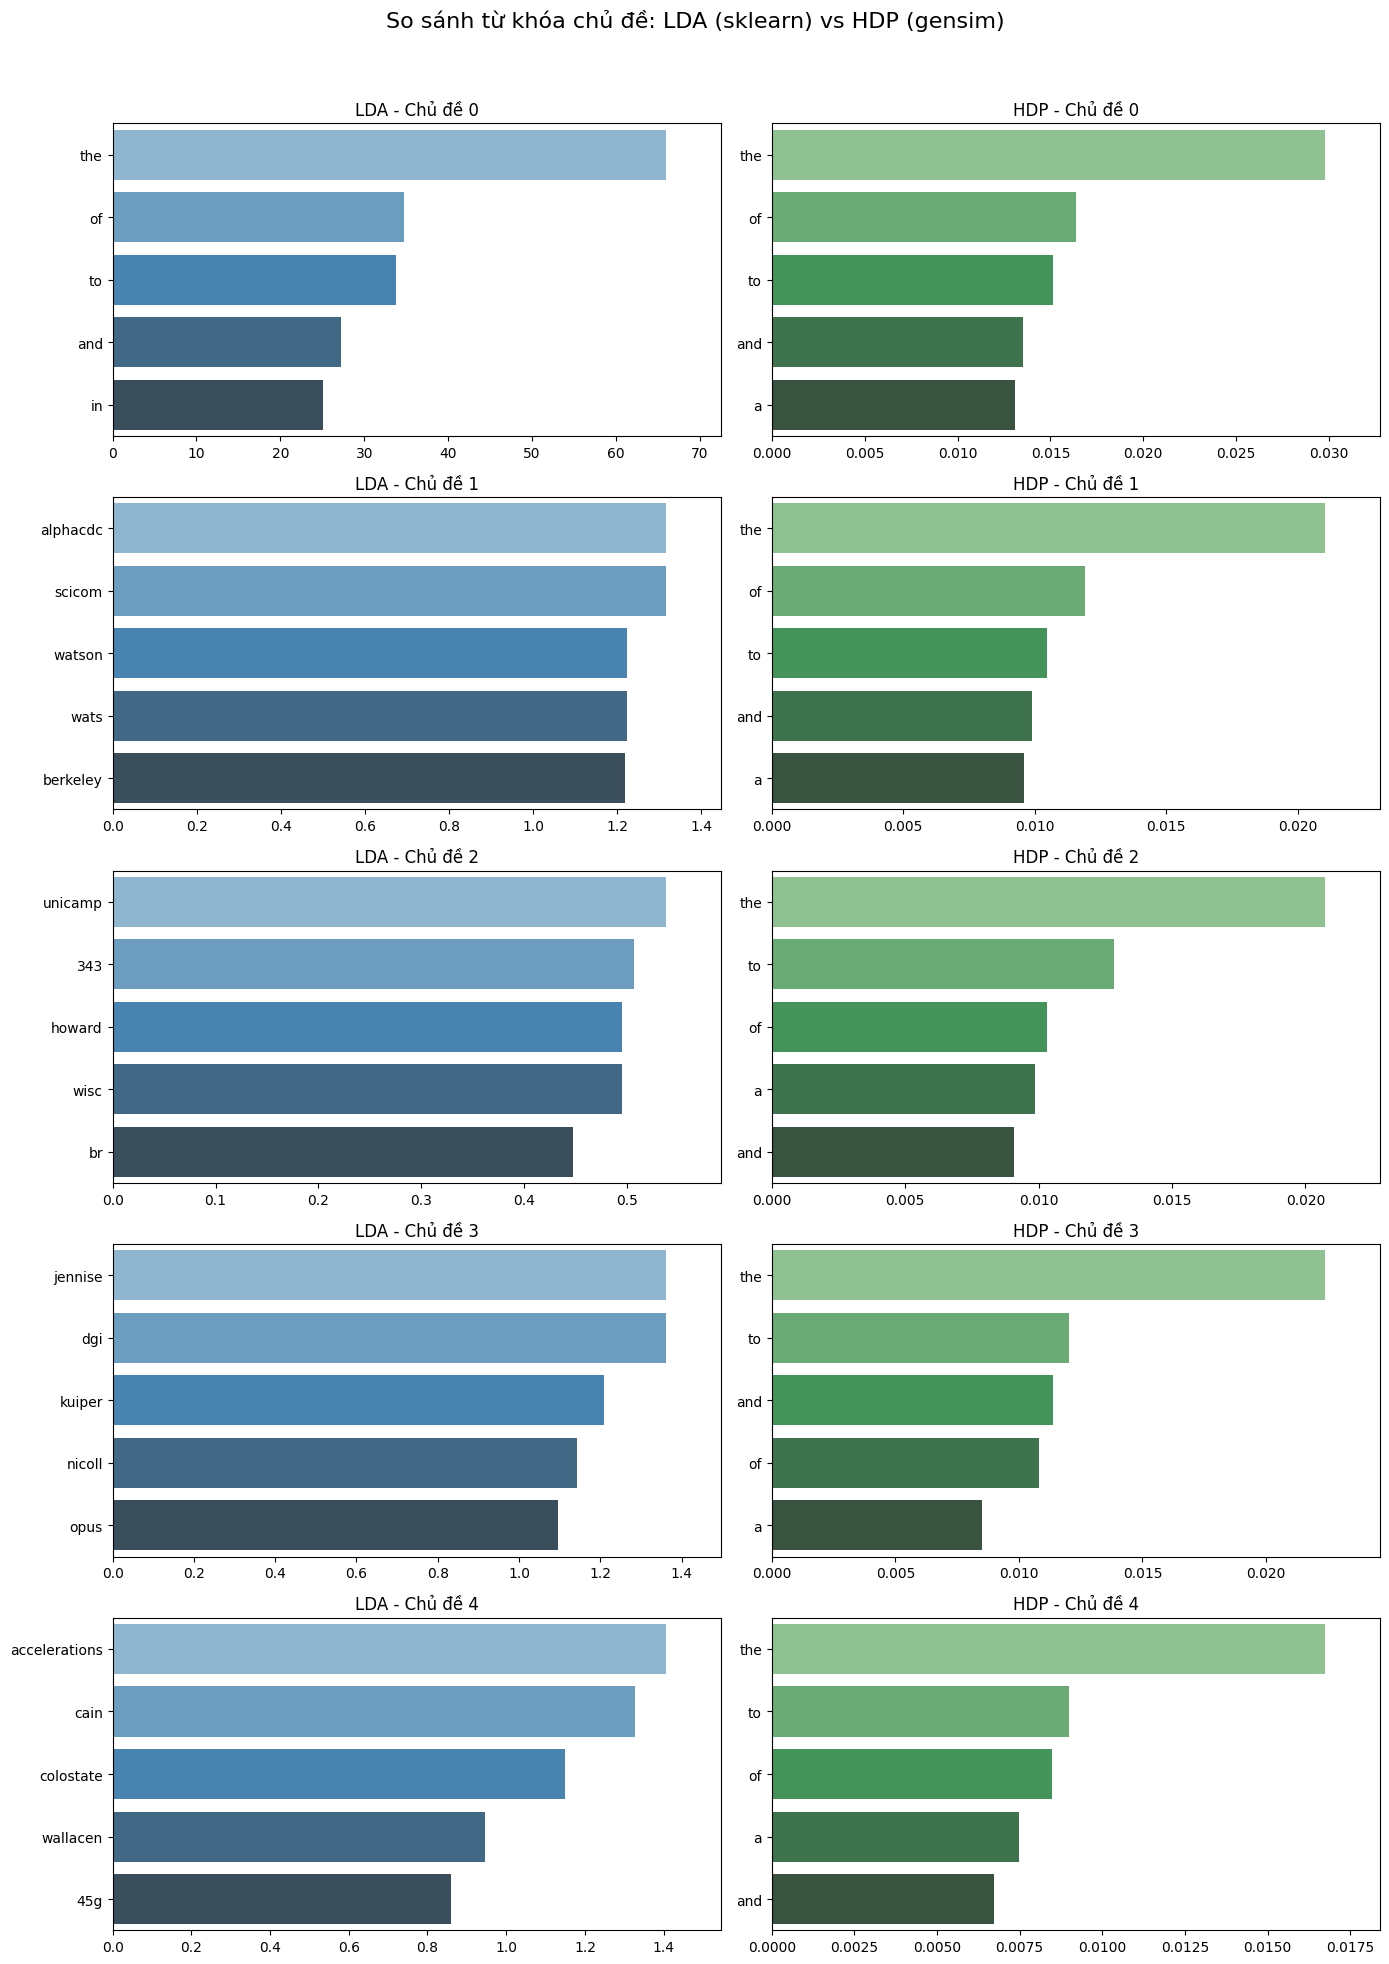

In [19]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import HdpModel
from gensim.corpora import Dictionary

# TF-IDF + LDA (sklearn)
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(docs)
lda_sklearn = LatentDirichletAllocation(n_components=5, random_state=42)
lda_sklearn.fit(tfidf)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Token hóa cho HDP
tokenized_docs = [doc.split() for doc in docs]
dictionary = Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
hdp = HdpModel(corpus=corpus, id2word=dictionary)
# HDP (gensim)
def get_topic_keywords_gensim(model, num_topics=5, num_words=5):
    topic_words = {}
    for topic_id in range(num_topics):
        topic = model.show_topic(topic_id, topn=num_words)
        words = [word for word, prob in topic]
        probs = [prob for word, prob in topic]
        topic_words[f"Chủ đề {topic_id}"] = (words, probs)
    return topic_words

# LDA (sklearn)
def get_topic_keywords_sklearn(model, feature_names, num_topics=5, num_words=5):
    topic_words = {}
    for topic_id, topic in enumerate(model.components_[:num_topics]):
        top_indices = topic.argsort()[-num_words:][::-1]
        words = [feature_names[i] for i in top_indices]
        probs = [topic[i] for i in top_indices]
        topic_words[f"Chủ đề {topic_id}"] = (words, probs)
    return topic_words
import matplotlib.pyplot as plt
import seaborn as sns

# Lấy từ khóa
lda_topics = get_topic_keywords_sklearn(lda_sklearn, feature_names)
hdp_topics = get_topic_keywords_gensim(hdp)

# Vẽ
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 20))
fig.suptitle('So sánh từ khóa chủ đề: LDA (sklearn) vs HDP (gensim)', fontsize=16)

for i in range(5):
    # LDA
    lda_words, lda_probs = lda_topics[f"Chủ đề {i}"]
    sns.barplot(x=lda_probs, y=lda_words, ax=axes[i, 0], palette="Blues_d")
    axes[i, 0].set_title(f"LDA - Chủ đề {i}")
    axes[i, 0].set_xlim(0, max(lda_probs)*1.1)

    # HDP
    hdp_words, hdp_probs = hdp_topics[f"Chủ đề {i}"]
    sns.barplot(x=hdp_probs, y=hdp_words, ax=axes[i, 1], palette="Greens_d")
    axes[i, 1].set_title(f"HDP - Chủ đề {i}")
    axes[i, 1].set_xlim(0, max(hdp_probs)*1.1)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


 LSA (Latent Semantic Analysis)

In [ ]:
from sklearn.decomposition import TruncatedSVD

# Sử dụng TF-IDF từ phần NMF
lsa = TruncatedSVD(n_components=5, random_state=42)
lsa.fit(tfidf)

# Hiển thị chủ đề
for topic_idx, topic in enumerate(lsa.components_):
    print(f"\nChủ đề {topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[-10:]]))


Chủ đề 0:
article gov alaska toronto access com henry nasa space edu

Chủ đề 1:
kipling umd utzoo edu work spencer zoology zoo toronto henry

Chủ đề 2:
_____ __ kelvin nasa toronto gov henry ___ jpl baalke

Chủ đề 3:
toronto communications online express henry prb com pat digex access

Chủ đề 4:
topaz steinly ucsc pyron king dseg ti sysmgr eng umd


C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_26920\1559879877.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_26920\1559879877.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_26920\1559879877.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_26920\1559879877.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable t

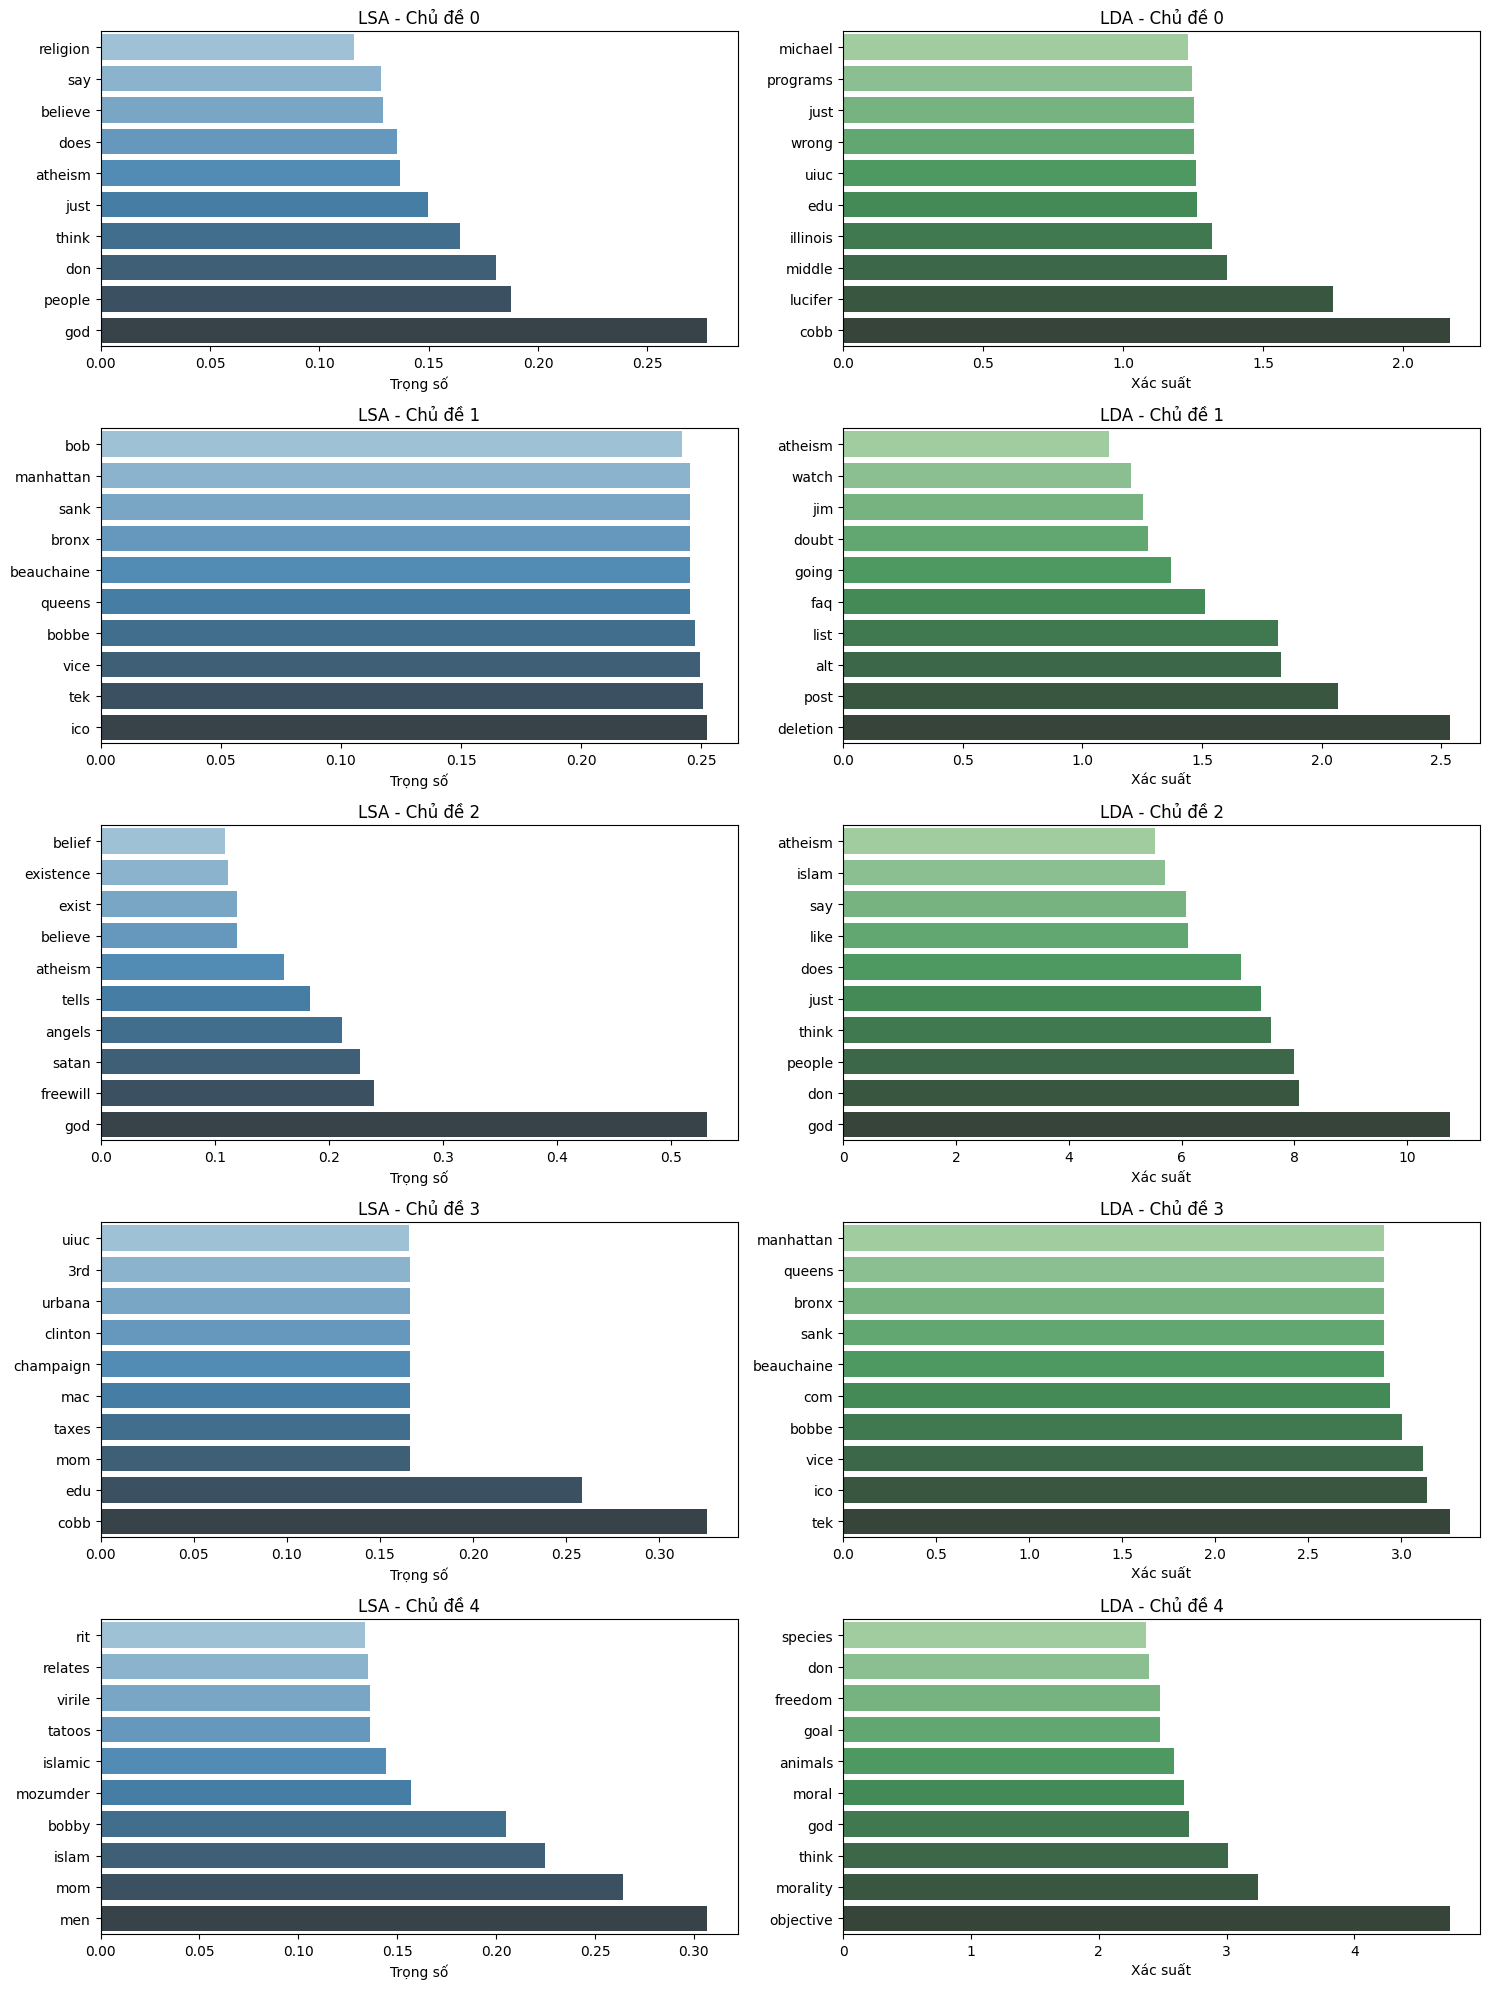

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Bước 1: Chuẩn bị dữ liệu và vectorizer
# (Bạn thay `documents` bằng danh sách văn bản thực tế)
# documents = [...]

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Bước 2: Áp dụng LSA
lsa = TruncatedSVD(n_components=5, random_state=42)
lsa.fit(tfidf)

lsa_topics = []
for topic in lsa.components_:
    lsa_topics.append([feature_names[i] for i in topic.argsort()[-10:]])

# Bước 3: Áp dụng LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf)

lda_topics = []
for topic in lda.components_:
    lda_topics.append([feature_names[i] for i in topic.argsort()[-10:]])

# Bước 4: Trực quan hóa so sánh từ khóa chủ đề
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
for i in range(5):
    # LSA
    sns.barplot(
        ax=axes[i, 0],
        y=lsa_topics[i],
        x=lsa.components_[i][[feature_names.tolist().index(w) for w in lsa_topics[i]]],
        palette="Blues_d"
    )
    axes[i, 0].set_title(f'LSA - Chủ đề {i}')
    axes[i, 0].set_xlabel("Trọng số")

    # LDA
    sns.barplot(
        ax=axes[i, 1],
        y=lda_topics[i],
        x=lda.components_[i][[feature_names.tolist().index(w) for w in lda_topics[i]]],
        palette="Greens_d"
    )
    axes[i, 1].set_title(f'LDA - Chủ đề {i}')
    axes[i, 1].set_xlabel("Xác suất")

plt.tight_layout()
plt.show()
